Allesfitter comes with a whole suite of plotting convenience functions, which are tailored towards lightcurves and RV time series.

In [1]:
from allesfitter.plotting import *
from allesfitter.inout import read_csv

First, let us simply try out all plot styles out-of-the-box and directly from a csv file (exemplified on a TOI-270 TESS lightcurve).

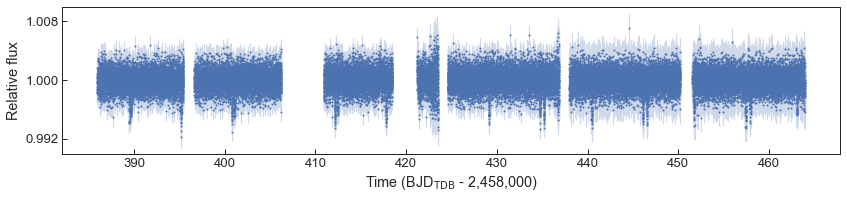

In [2]:
fullplot_csv('TESS.csv'); #the boring normal plot

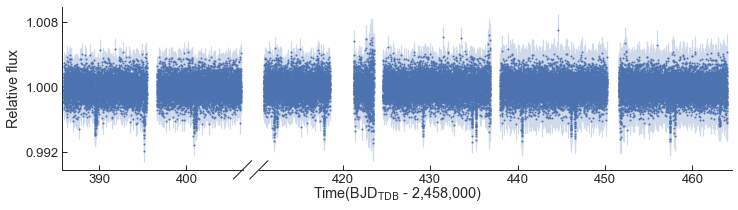

In [3]:
brokenplot_csv('TESS.csv', dt=3); #a plot breaking the axes if there are gaps longer than dt=3 days

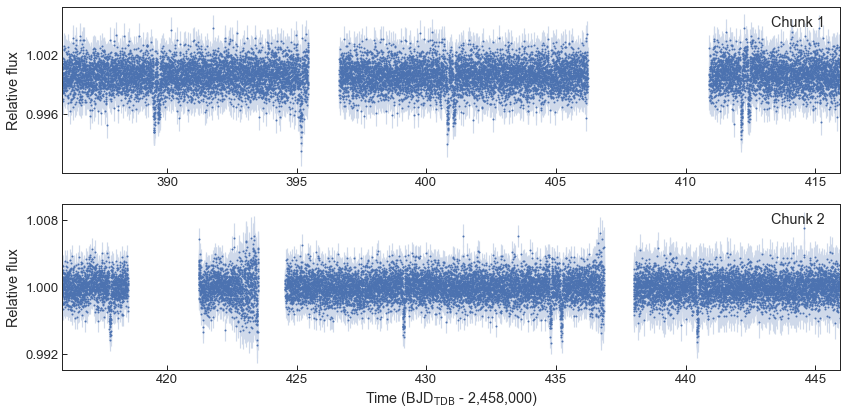

In [4]:
chunkplot_csv('TESS.csv', chunk_size=30); #a plot breaking any long time series into chunks of chunk_size=30 days

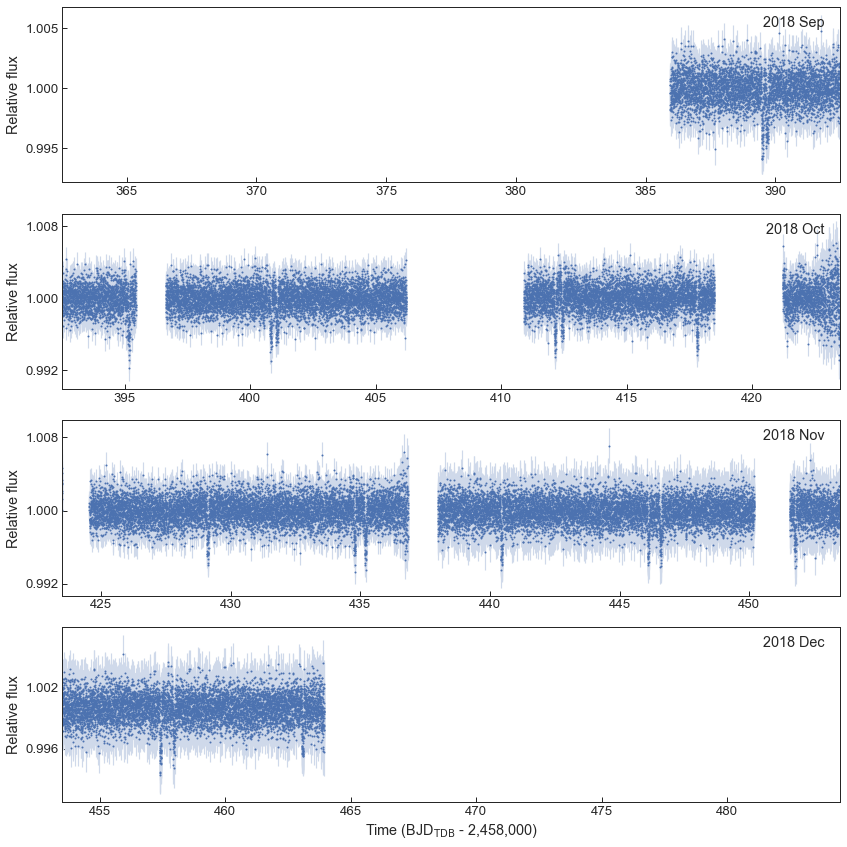

In [5]:
monthplot_csv('TESS.csv'); #a plot breaking the time series into calendar months; requires BJD_TDB input!

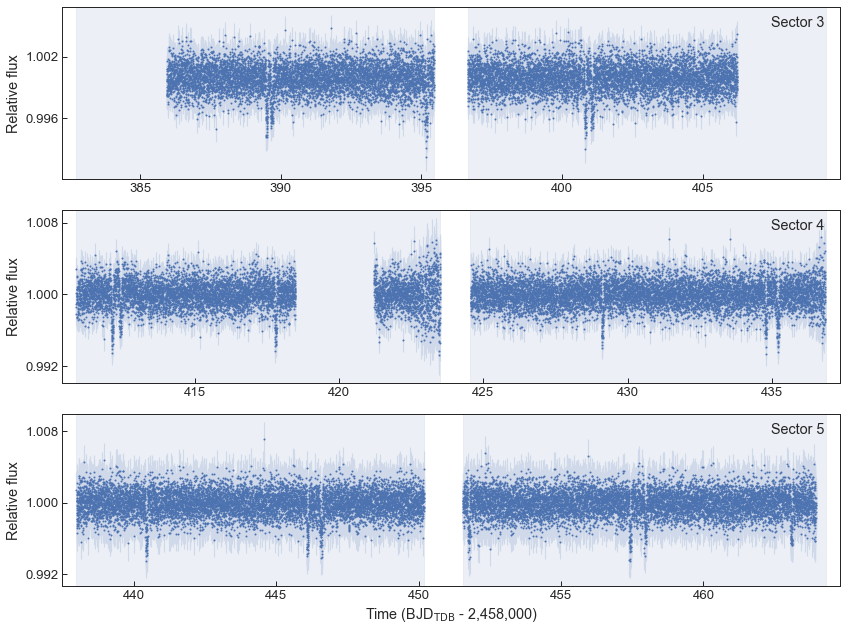

In [6]:
tessplot_csv('TESS.csv'); #and most glamorous, the tessplot! Requires BJD_TDB.

Now on to trickier stuff; first, let us actually load the data, so we can manipulate some of it, and also simulate an arbitrary trend for illustrative purposes

In [7]:
import numpy as np
time, flux, flux_err = read_csv('TESS.csv')
ind_mask = slice(18000,21000,1)
color = np.sin(2*np.pi*time/10.)
trend_time = np.linspace(2458390, 2458450, 10000)
trend_flux = 1.+0.001*np.sin(2*np.pi*trend_time/10.)

Now let us make all kinds of strange plots with weird features to demonstrate everything we can do: 
 - clip outliers,
 - mark data ranges (e.g. bad data or transits)
 - use scatter colors
 - overplot any trends

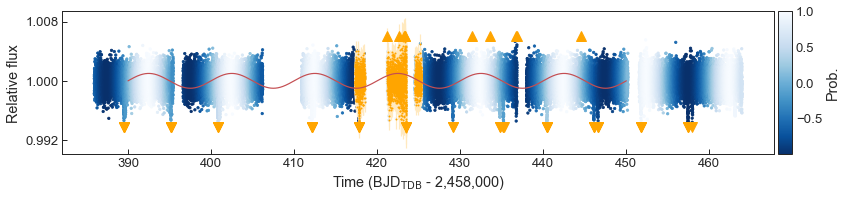

In [8]:
#we first establish the basic plot with all data; here we clip outliers and use a scatter color
ax = fullplot(time, flux, yerr=flux_err, clip=True, color=color, cmap='Blues_r');
#then we take its axes/axis and pass it over to the next call where we overplot certain data ranges in a different color
fullplot(time[ind_mask], flux[ind_mask], yerr=flux_err[ind_mask], color='orange', ax=ax);
#finally, we also overplot the arbitrary trend
fullplot(trend_time, trend_flux, marker='', ls='-', color='r', ax=ax);

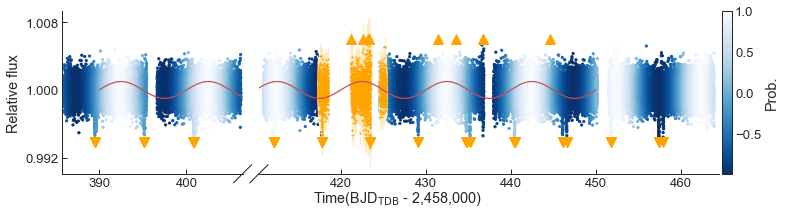

In [9]:
#now we do the same for brokenplot
bax = brokenplot(time, flux, yerr=flux_err, dt=3, clip=True, color=color, cmap='Blues_r');
brokenplot(time[ind_mask], flux[ind_mask], yerr=flux_err[ind_mask], color='orange', bax=bax);
brokenplot(trend_time, trend_flux, marker='', ls='-', color='r', bax=bax);

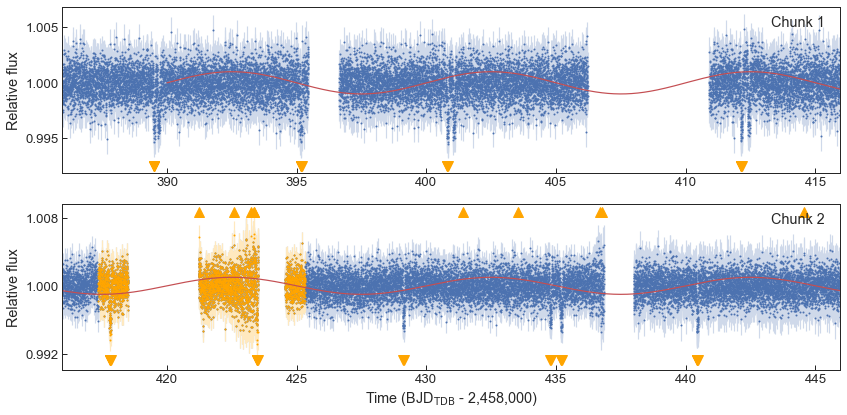

In [10]:
#now we do the same for chunkplot
axes = chunkplot(time, flux, yerr=flux_err, clip=True);
chunkplot(time[ind_mask], flux[ind_mask], yerr=flux_err[ind_mask], color='orange', axes=axes);
chunkplot(trend_time, trend_flux, marker='', ls='-', color='r', axes=axes);

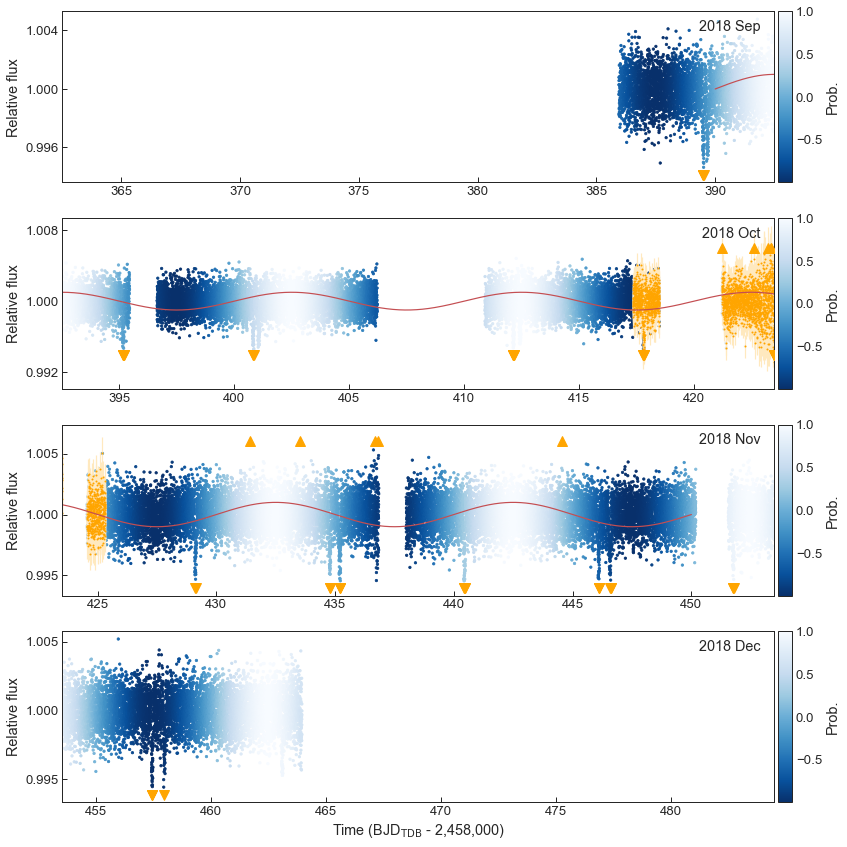

In [11]:
#now we do the same for monthplot
axes = monthplot(time, flux, yerr=flux_err, clip=True, color=color, cmap='Blues_r');
monthplot(time[ind_mask], flux[ind_mask], yerr=flux_err[ind_mask], color='orange', axes=axes);
monthplot(trend_time, trend_flux, marker='', ls='-', color='r', axes=axes);

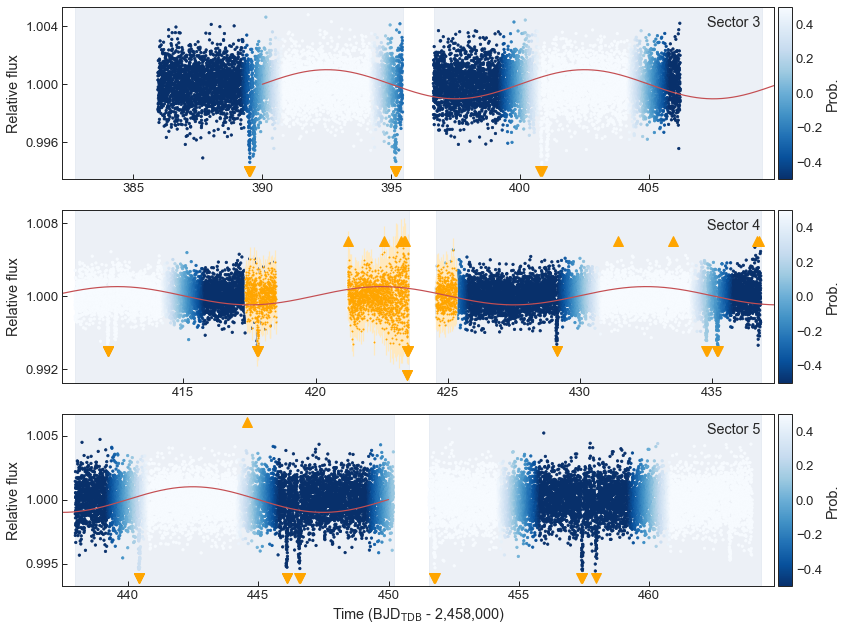

In [12]:
#now we do the same for tessplot
axes = tessplot(time, flux, yerr=flux_err, clip=True, color=color, cmap='Blues_r', vmin=-0.5, vmax=0.5);
tessplot(time[ind_mask], flux[ind_mask], yerr=flux_err[ind_mask], clip=True, color='orange', axes=axes);
tessplot(trend_time, trend_flux, marker='', ls='-', color='r', axes=axes);